<a href="https://colab.research.google.com/github/jhat-knight/economic-indicators-viz/blob/main/economic_indicators_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U kaleido > /dev/null

In [2]:
!pip install fredapi > /dev/null

In [3]:
import pandas as pd
import pandas_datareader as pdr
import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import requests
import kaleido

**Data Acquisition**

Data sourced from Python API, FRED.

* What is **FRED**?
  * Federal Reserve Economic Data
  * FRED® API:
    * Web service that allows developers to write programs and build applications that retrieve economic data from the FRED® and ALFRED® websites hosted by the **Economic Research Division of the Federal Reserve Bank of St. Louis**.

In [4]:
from fredapi import Fred
fred = Fred(api_key='your-api-key-here')

**Context:**

**All Employees: Total Nonfarm Payroll**

* The number of U.S. workers in the economy that **excludes** proprietors, private household employees, unpaid volunteers, farm employees, and the unincorporated self-employed.

* Accounts for approx. **80% of workers** who contribute to GDP.  

* Provides insights into the current economic situation; can represent the number of jobs added or lost in the economy.
  * Increases in employment might indicate that businesses are hiring; might suggest that businesses are growing.

  * **Example:** Newly employed individuals have increased their personal incomes, which means their disposable incomes have also increased.

**Citation:**
U.S. Bureau of Labor Statistics, All Employees, Total Nonfarm [PAYEMS], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/PAYEMS

In [5]:
df_emp_series_info = fred.get_series_info('PAYEMS')
print(df_emp_series_info)

id                                                                      PAYEMS
realtime_start                                                      2024-06-07
realtime_end                                                        2024-06-07
title                                             All Employees, Total Nonfarm
observation_start                                                   1939-01-01
observation_end                                                     2024-05-01
frequency                                                              Monthly
frequency_short                                                              M
units                                                     Thousands of Persons
units_short                                                  Thous. of Persons
seasonal_adjustment                                        Seasonally Adjusted
seasonal_adjustment_short                                                   SA
last_updated                                        

Employment data collected for the year 2022, indexed from Dec. 2021 to Jan. 2023.

In [6]:
start_date = datetime.date(2021,12,1)
end_date = datetime.date(2023,1,1)

In [7]:
df_emp = pdr.DataReader('PAYEMS', 'fred', start_date, end_date)

In [8]:
df_emp.head()

,PAYEMS
DATE,
2021-12-01,149763
2022-01-01,150014
2022-02-01,150876
2022-03-01,151370
2022-04-01,151642


In [9]:
df_emp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14 entries, 2021-12-01 to 2023-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAYEMS  14 non-null     int64
dtypes: int64(1)
memory usage: 224.0 bytes


**Context:**

**Average Hourly Earnings of All Private Employees**

* A measure of the average hourly earnings of all private employees on a “gross” basis, including premium pay for overtime and late-shift work.

* Excludes benefits, irregular bonuses, retroactive pay, and payroll taxes paid by the employer.

* **Average Hourly Earnings** is provided on a monthly basis

  * Used by macroeconomists as an initial economic indicator of current trends.

  * Progressions in earnings specifically help policy makers understand some of the pressures driving inflation.  
  
* Important to note that this measures the average hourly earnings of the pool of workers in each period.

  * Changes in average hourly earnings can be due to either changes in the set of workers observed in a given period, or due to changes in earnings.
  
  * **Example:** In recessions that lead to the disproportionate increase of unemployment in lower-wage jobs, average hourly earnings can increase due to changes in the pool of workers.

**Citation:**
U.S. Bureau of Labor Statistics, Average Hourly Earnings of All Employees, Total Private [CES0500000003], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CES0500000003

Avg hourly earnings year-over-year, indexed from Dec. 2019 to Jan. 2023.

In [10]:
start_date_avg_earn = datetime.date(2019,12,1)
end_date_avg_earn = datetime.date(2023,1,1)

In [11]:
df_avg_earn_info = fred.get_series_info('CES0500000003')
df_avg_earn_info

id                                                               CES0500000003
realtime_start                                                      2024-06-25
realtime_end                                                        2024-06-25
title                        Average Hourly Earnings of All Employees, Tota...
observation_start                                                   2006-03-01
observation_end                                                     2024-05-01
frequency                                                              Monthly
frequency_short                                                              M
units                                                         Dollars per Hour
units_short                                                         $ per Hour
seasonal_adjustment                                        Seasonally Adjusted
seasonal_adjustment_short                                                   SA
last_updated                                        

In [12]:
df_avg_earn = pdr.DataReader('CES0500000003', 'fred', start_date_avg_earn, end_date_avg_earn)

In [13]:
df_avg_earn.head()

,CES0500000003
DATE,
2019-12-01,28.37
2020-01-01,28.44
2020-02-01,28.55
2020-03-01,28.77
2020-04-01,30.01


In [14]:
df_avg_earn.columns

Index(['CES0500000003'], dtype='object')

In [15]:
df_avg_earn.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38 entries, 2019-12-01 to 2023-01-01
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CES0500000003  38 non-null     float64
dtypes: float64(1)
memory usage: 608.0 bytes


**Context:**

**Consumer Price Index for All Urban Consumers: All Items Less Food & Energy**

* Aggregate of prices paid by urban consumers for a typical basket of goods.
  * Excludes food and energy prices.
  * Measurement known as "Core CPI".
  * Widely used by economists because food and energy have very volatile prices.

**Citation:** U.S. Bureau of Labor Statistics, Consumer Price Index for All Urban Consumers: All Items Less Food and Energy in U.S. City Average [CPILFESL], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CPILFESL

In [16]:
df_cpi_info = fred.get_series_info('CPILFESL')
df_cpi_info

id                                                                    CPILFESL
realtime_start                                                      2024-06-12
realtime_end                                                        2024-06-12
title                        Consumer Price Index for All Urban Consumers: ...
observation_start                                                   1957-01-01
observation_end                                                     2024-05-01
frequency                                                              Monthly
frequency_short                                                              M
units                                                      Index 1982-1984=100
units_short                                                Index 1982-1984=100
seasonal_adjustment                                        Seasonally Adjusted
seasonal_adjustment_short                                                   SA
last_updated                                        

In [17]:
start_date_cpi = datetime.date(2019,12,1)
end_date_cpi = datetime.date(2023,3,1)

In [18]:
df_cpi = pdr.DataReader('CPILFESL', 'fred', start_date_cpi, end_date_cpi)
df_cpi.head()

,CPILFESL
DATE,
2019-12-01,266.020
2020-01-01,266.698
2020-02-01,267.402
2020-03-01,267.068
2020-04-01,265.796


In [19]:
df_cpi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40 entries, 2019-12-01 to 2023-03-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CPILFESL  40 non-null     float64
dtypes: float64(1)
memory usage: 640.0 bytes


**Processing**

**Employment data:**

I want to look at the **change** in the number of jobs from month-to-month.

In [20]:
df_emp['DATE'] = df_emp.index

In [21]:
df_emp.head()

,PAYEMS,DATE
DATE,,
2021-12-01,149763,2021-12-01
2022-01-01,150014,2022-01-01
2022-02-01,150876,2022-02-01
2022-03-01,151370,2022-03-01
2022-04-01,151642,2022-04-01


In [22]:
# shift the index by 1 period, NaN is valid in first row.
df_emp['CHANGE'] = df_emp['PAYEMS'] - df_emp['PAYEMS'].shift(1)
df_emp.head()

,PAYEMS,DATE,CHANGE
DATE,,,
2021-12-01,149763,2021-12-01,NaN
2022-01-01,150014,2022-01-01,251.0
2022-02-01,150876,2022-02-01,862.0
2022-03-01,151370,2022-03-01,494.0
2022-04-01,151642,2022-04-01,272.0


**Visualization**

**Employment data:**

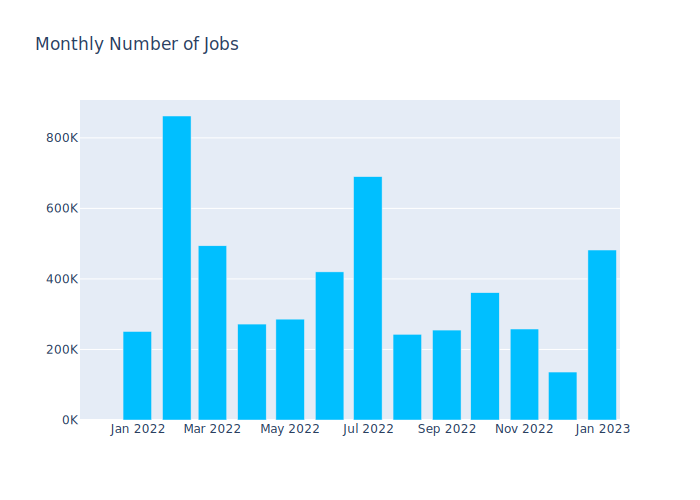

In [23]:
fig = px.bar(df_emp, y = 'CHANGE', x = 'DATE', title="Monthly Number of Jobs")
fig.update_traces(marker_color='deepskyblue')
fig.update_layout(xaxis_title = None, yaxis_title = None, yaxis_ticksuffix = "K")
fig.show('svg')

**Processing**

**Average Hourly Earnings of All Private Employees:**

In [24]:
df_avg_earn['DATE'] = df_avg_earn.index

In [25]:
df_avg_earn['avg_hourly_earnings_per_month'] = df_avg_earn['CES0500000003']

In [26]:
df_avg_earn['pct_avg_hourly_earnings_per_month'] = df_avg_earn['avg_hourly_earnings_per_month'].pct_change()

**Visualization:**

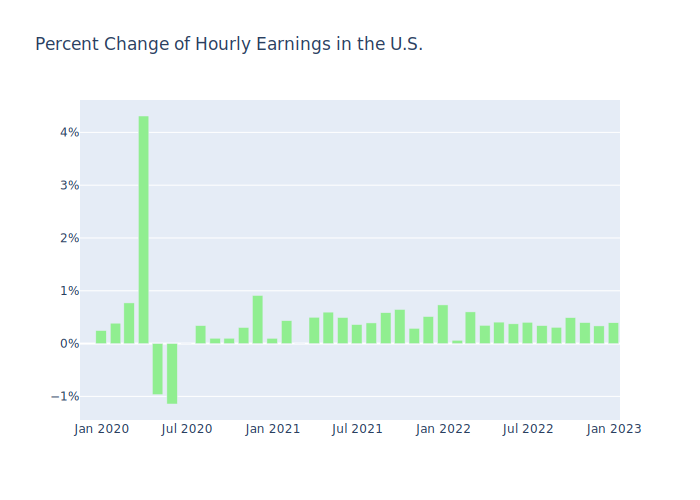

In [27]:
fig = px.bar(df_avg_earn, y = 'pct_avg_hourly_earnings_per_month', x = 'DATE', title="Percent Change of Hourly Earnings in the U.S.")
fig.update_traces(marker_color='lightgreen')
fig.update_layout(xaxis_title = None, yaxis_title = None, yaxis_tickformat = ',.0%')
fig.show('svg')

* The change in earnings peaked at over 4% in April 2020.
* Sharp drop in change during the months of May and June of 2020, of course this was during the height of the pandemic.  

**Consumer Price Index for All Urban Consumers: All Items Less Food and Energy in U.S. City Average:**

**Processing**

In [28]:
df_cpi['DATE'] = df_cpi.index

In [29]:
df_cpi.head()

,CPILFESL,DATE
DATE,,
2019-12-01,266.020,2019-12-01
2020-01-01,266.698,2020-01-01
2020-02-01,267.402,2020-02-01
2020-03-01,267.068,2020-03-01
2020-04-01,265.796,2020-04-01


In [30]:
df_cpi['Consumer_Price_Index'] = df_cpi['CPILFESL']

In [31]:
df_cpi.head()

,CPILFESL,DATE,Consumer_Price_Index
DATE,,,
2019-12-01,266.020,2019-12-01,266.020
2020-01-01,266.698,2020-01-01,266.698
2020-02-01,267.402,2020-02-01,267.402
2020-03-01,267.068,2020-03-01,267.068
2020-04-01,265.796,2020-04-01,265.796


In [32]:
df_cpi['Consumer_Price_Index'] = df_cpi['Consumer_Price_Index'].pct_change()

**Visualization:**

**Info:**

* The index for all items less food and energy rose 0.4 percent in March, after rising 0.5 percent in February.<br><br>
    * Indexes which increased in March include
      * shelter
      * motor vehicle insurance
      * airline fares
      * new vehicles
      * household furnishings and operations
    
    The index for medical care and the index for used cars and trucks were among those that decreased over the month.<br><br>

* All items index increased 5.0 percent for the 12 months ending March  
    * Smallest 12-month increase since May 2021
    * All items less food and energy index rose 5.6 percent over the last 12 months.
    * Energy index decreased 6.4 percent for the 12 months ending March
    * Food index increased 8.5 percent over the last year

Source: U.S. Bureau of Labor Statistics: Economic News Release, Consumer Price Index Summary

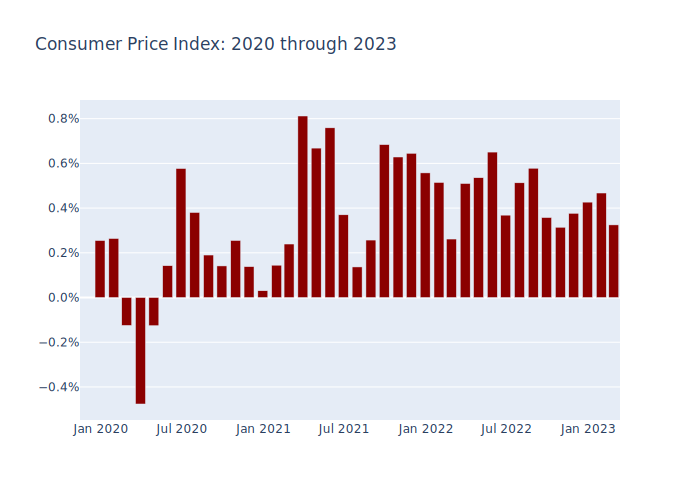

In [33]:
fig = px.bar(df_cpi, y = 'Consumer_Price_Index', x = 'DATE', title="Consumer Price Index: 2020 through 2023")
fig.update_traces(marker_color='darkred')
fig.update_layout(xaxis_title = None, yaxis_title = None, yaxis_tickformat = '.01%')
fig.show('svg')